In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# bin into $1000000 classes
y["Salary2"] = y["Salary"] // 1000000

In [50]:
# read in data
df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
df.head()

C:\Users\gian\AppData\Local\Temp\ipykernel_36116\4034987211.py:2: DtypeWarning: Columns (22,36,37,46,47,48,49,50,51,52,53,54,56,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Abbreviation,State Name,County Name,District,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause,Contributing Accident Cause,Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Joint CD,Incident Key,Report Key,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,120068,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,0.0,0.0,0.0,0.0,GEORGIA,NaN,NaN,MACON,242.00,GA,GEORGIA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,GM44,6.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,NaN,NaN,NaN,NaN,Not a remotely controlled operation,TILX,150060,13.0,No,NaN,NaN,0.0,NaN,0.0,0.0,No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,Failure to comply with restricted speed or its...,NaN,Failure to comply with restricted speed or its...,1.0,0.0,1.0,0.0,6.0,40.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTH,000-000-000,32.813658,-83.622785,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,3.0,NS120068201604,NS120068201604,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Compa

In [130]:
# Get unqiue values of District
# df['District'].unique()
df = df.drop(['District'], axis=1)
df = df.drop(['Joint CD'], axis=1)

In [131]:
# One-hot "Districts"
# df = pd.get_dummies(df, columns=['District'], drop_first=False, dtype='int64')
df.columns
df.head()

,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Abbreviation,State Name,County Name,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause,Contributing Accident Cause,Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Incident Key,Report Key,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,120068,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,0.0,0.0,0.0,0.0,GEORGIA,NaN,NaN,MACON,242.00,GA,GEORGIA,BIBB,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,GM44,6.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,NaN,NaN,NaN,NaN,Not a remotely controlled operation,TILX,150060,13.0,No,NaN,NaN,0.0,NaN,0.0,0.0,No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,Failure to comply with restricted speed or its...,NaN,Failure to comply with restricted speed or its...,1.0,0.0,1.0,0.0,6.0,40.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTH,000-000-000,32.813658,-83.622785,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,NS120068201604,NS120068201604,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,

In [132]:
# # creating a column with a 1 if there were any deaths in Total Persons Killed, 0 otherwise
# df['deaths'] = np.where(df['Total Persons Killed'] > 0, 1, 0)
# # make sure this is an int64 type
# df['deaths'] = df['deaths'].astype('int64')
# deaths = df['deaths']
# # Removing the columns that had deaths
# df = df.drop(['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54'], axis=1)

In [133]:
# creating a column with a 1 if there were any deaths or injuries at all across all categories, 0 otherwise
c = ['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54']
df['Casualty'] = np.where(df[c].sum(axis=1) > 0, 1, 0)
# make sure this is an int64 type
df['Casualty'] = df['Casualty'].astype('int64')
casualty = df['Casualty']
# removing all the columns that had deaths or injuries
df = df.drop(['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54'], axis=1)


In [134]:
# drop all non numeric columns
df = df.select_dtypes(include=['float64', 'int64'])
# print remaining columns
df.columns

Index(['Report Year', 'Accident Year', 'Accident Month', 'Other Accident Year',
       'Other Accident Month', 'Maintenance Accident Year',
       'Maintenance Accident Month', 'Day', 'Hazmat Cars',
       'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated',
       'Temperature', 'Train Speed', 'Maximum Speed', 'Gross Tonnage',
       'First Car Position', 'Causing Car Number', 'Causing Car Position',
       'Positive Alcohol Tests', 'Positive Drug Tests', 'Head End Locomotives',
       'Mid Train Manual Locomotives', 'Mid Train Remote Locomotives',
       'Rear End Manual Locomotives', 'Rear End Remote Locomotives',
       'Derailed Head End Locomotives',
       'Derailed Mid Train Manual Locomotives',
       'Derailed Mid Train Remote Locomotives',
       'Derailed Rear End Manual Locomotives',
       'Derailed Rear End Remote Locomotives', 'Loaded Freight Cars',
       'Loaded Passenger Cars', 'Empty Freight Cars', 'Empty Passenger Cars',
       'Cabooses', 'Derailed 

In [135]:
# drop ['Causing Car Number']
df = df.drop(['Causing Car Number'], axis=1)

In [136]:
# find all rows that have na, order by most na to least
# drop all columns with more than 10000 na
na_counts = df.isna().sum()
cols_to_drop = na_counts[na_counts > 1000].index.tolist()

# drop columns with more than 1000 missing values
df.drop(cols_to_drop, axis=1, inplace=True)

# fill in the rest of the na with the mean of the column
df.fillna(df.mean(), inplace=True)

print(df.isna().sum().sort_values(ascending=False))

# find length of df
len(df)

Report Year                              0
Cabooses                                 0
Derailed Mid Train Remote Locomotives    0
Derailed Rear End Manual Locomotives     0
Derailed Rear End Remote Locomotives     0
Loaded Freight Cars                      0
Loaded Passenger Cars                    0
Empty Freight Cars                       0
Empty Passenger Cars                     0
Derailed Loaded Freight Cars             0
Accident Year                            0
Derailed Loaded Passenger Cars           0
Derailed Empty Freight Cars              0
Derailed Empty Passenger Cars            0
Derailed Cabooses                        0
Equipment Damage Cost                    0
Track Damage Cost                        0
Total Damage Cost                        0
Derailed Mid Train Manual Locomotives    0
Derailed Head End Locomotives            0
Rear End Remote Locomotives              0
Rear End Manual Locomotives              0
Accident Month                           0
Maintenance

216100

In [137]:
# split into train test
from sklearn.model_selection import train_test_split
# X = df.drop(['deaths'], axis=1)
X = df.drop(['Casualty'], axis=1)
# y = df['deaths']
y = df['Casualty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
# Fit a logisitc regression across all variables trying to predict whether or not a person died
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [139]:
# print the accuracy of the model
print(log_reg.score(X_test, y_test))

0.928250809810273


<AxesSubplot:xlabel='feature'>

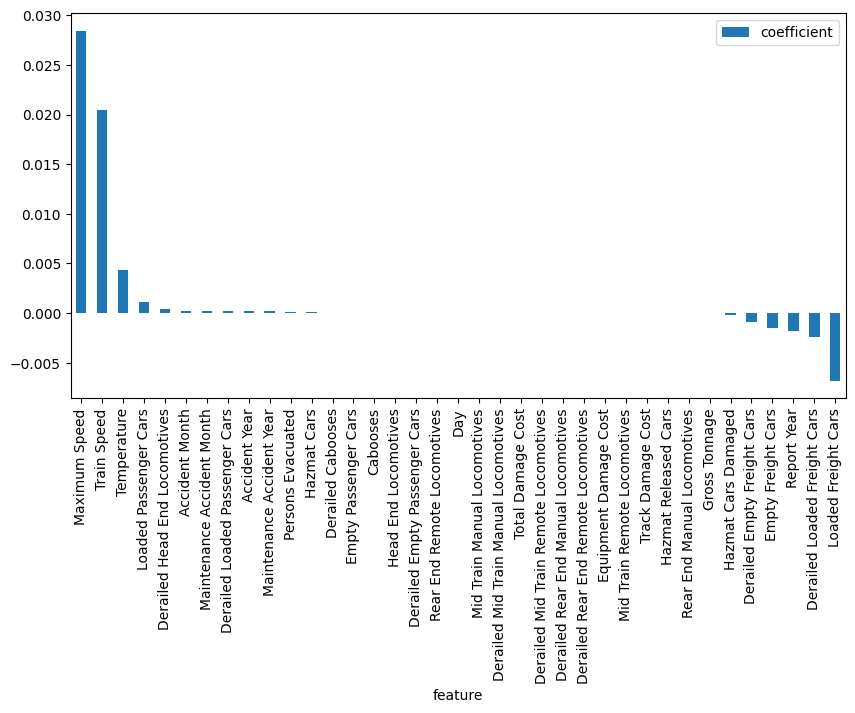

In [140]:
# match the coefficients to the column names
# coefficients = pd.DataFrame({'feature': df.drop(['deaths'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
coefficients = pd.DataFrame({'feature': df.drop(['Casualty'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
# order the coefficients from highest to lowest
coefficients.sort_values('coefficient', ascending=False)
coefficients.sort_values('coefficient', ascending=False).plot.bar(x='feature', y='coefficient', figsize=(10,5))

In [141]:
# FIND THE P VALUES FOR THE COEFFICIENTS
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


         Current function value: 0.206533
         Iterations: 35


c:\Users\gian\miniconda3\envs\treten\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                     Results: Logit
Model:                                  Logit                              Pseudo R-squared:                   0.205     
Dependent Variable:                     Casualty                           AIC:                                89335.5886
Date:                                   2023-04-25 21:41                   BIC:                                89705.7945
No. Observations:                       216100                             Log-Likelihood:                     -44632.   
Df Model:                               35                                 LL-Null:                            -56142.   
Df Residuals:                           216064                             LLR p-value:                        0.0000    
Converged:                              0.0000                             Scale:                              1.0000    
No. Iterations:                         35.0000                               

In [150]:
# plot the points from the logit_model
coefs = logit_model.params


AttributeError: 'Logit' object has no attribute 'params'

In [142]:
# find the Loaded Passenger Cars coefficient
print(coefficients[coefficients['feature'] == 'Loaded Passenger Cars'])

                  feature  coefficient
25  Loaded Passenger Cars     0.001133


In [143]:
# get list of coefficients that had a large impact on the model
coefficients[abs(coefficients['coefficient']) > 0.001]
# this has to be absolute value because some coefficients are negative
impacts = coefficients[abs(coefficients['coefficient']) > 0.001]['feature'].tolist()

# keep only the columns that had a large impact on the model
df = df[impacts]
# add back in the deaths column
# df['deaths'] = deaths
df['Casualty'] = casualty

df.head()

,Report Year,Temperature,Train Speed,Maximum Speed,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Derailed Loaded Freight Cars,Casualty
0,2016.0,60.0,6.0,6,30.0,0.0,20.0,0.0,0
1,2016.0,60.0,4.0,6,12.0,0.0,23.0,0.0,0
2,1981.0,28.0,0.0,4,1.0,0.0,0.0,1.0,0
3,2016.0,65.0,0.0,1,0.0,0.0,1.0,0.0,0
4,2016.0,65.0,1.0,1,31.0,0.0,20.0,0.0,0


In [144]:
# performing another logistic regression with only the columns that had a large impact on the model
# X = df.drop(['deaths'], axis=1)
X = df.drop(['Casualty'], axis=1)
# y = df['deaths']
y = df['Casualty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [145]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [146]:
# print the accuracy of the model
print(log_reg.score(X_test, y_test))

0.9267006015733457


<AxesSubplot:xlabel='feature'>

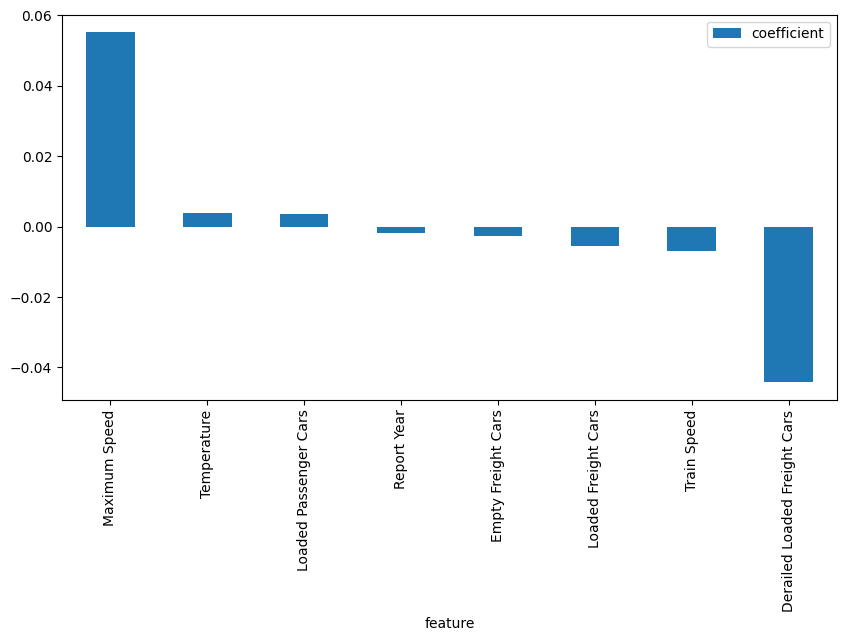

In [147]:
# match the coefficients to the column names
# coefficients = pd.DataFrame({'feature': df.drop(['deaths'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
coefficients = pd.DataFrame({'feature': df.drop(['Casualty'], axis=1).columns, 'coefficient': log_reg.coef_[0]})

# order the coefficients from highest to lowest
coefficients.sort_values('coefficient', ascending=False)
coefficients.sort_values('coefficient', ascending=False).plot.bar(x='feature', y='coefficient', figsize=(10,5))

In [94]:
# find model accuracy
log_reg.score(X_test, y_test)

0.9266543267006015

In [149]:
log_it = sm.Logit(y, X)
result = log_it.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.219687
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.154     
Dependent Variable:      Casualty             AIC:                  94964.8668
Date:                    2023-04-25 21:43     BIC:                  95047.1347
No. Observations:        216100               Log-Likelihood:       -47474.   
Df Model:                7                    LL-Null:              -56142.   
Df Residuals:            216092               LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                              Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [95]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# make it pretty
import seaborn as sns

# get predictions
predictions = log_reg.predict(X_test)

# create confusion matrix
confusion_matrix(y_test, predictions)

# plot confusion matrix and label the 0 and 1 with the correct labels and cmap = Blues
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues', fmt='g', xticklabels=['No Deaths', 'Deaths'], yticklabels=['No Deaths', 'Deaths'])
s_heatmap = sns.heatmap(confusion_matrix(df['Casualty'], predictions), annot=True, cmap='Blues', fmt='g', xticklabels=['No Casualty', 'Casualty'], yticklabels=['No Casualty', 'Casualty'])
# set predicted and actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')


# get the probabilities of each prediction
probs = log_reg.predict_proba(X_test)

# get the probability of a death
probs = probs[:,1]

# create a dataframe with the probabilities and the actual deaths
# probs_df = pd.DataFrame({'probs': probs, 'deaths': y_test})
probs_df = pd.DataFrame({'probs': probs, 'casualty': y_test})

# plot the probabilities hist
# probs_df.plot.hist(by='deaths', bins=20, alpha=0.5, xlabel='Probability of Death', ylabel='Frequency', title='Probability of Death by Actual Deaths', logy=True)
probs_df.plot.hist(by='casualty', bins=20, alpha=0.5, xlabel='Probability of Casualty', ylabel='Frequency', title='Probability of Casualty by Actual Casualty', logy=True)

ValueError: Found input variables with inconsistent numbers of samples: [216100, 43220]